In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn import datasets
import numpy as np

torch.set_default_dtype(torch.float64)
torch.set_default_device('cuda')


In [3]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [4]:
# defining hyperparameters
learning_rate = 0.01
batch_size = 50
epochs = 15

In [5]:
data = datasets.load_digits()
training_input = torch.tensor(data.images[0:1500]).double()
training_output = torch.tensor(data.target[0:1500]).double()

test_input = torch.tensor(data.images[1500:]).double()
test_output = torch.tensor(data.target[1500:])

test_data = (test_input, test_output)
training_data = (training_input, training_output)

In [6]:
model = nn.Sequential(
    nn.Linear(64, 128, True),
    nn.ReLU(),
    nn.Linear(128, 64, True),
    nn.ReLU(),
    nn.Linear(64, 32, True),
    nn.ReLU(),
    nn.Linear(32, 10, True),
    nn.Softmax(),
)

In [7]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
training_output = training_output.to(torch.int64)
training_output

tensor([0, 1, 2,  ..., 6, 3, 2], device='cuda:0')

In [14]:
for j in range(epochs):
    total_loss = 0.0
    correct = 0
    for i in range(1500):
        y = torch.nn.functional.one_hot(training_output[i], num_classes=10).to(torch.float32)

        model.zero_grad()
        out = model(training_input[i].flatten())

        loss = torch.nn.functional.cross_entropy(out, y, reduction="sum")
        loss.backward()
        if out.argmax().item() == y.argmax().item():
            correct += 1

        optimizer.step()
        total_loss += loss.item()
    print(f"epoch {j}, correct={correct}/{1500} ({( correct / 1500 * 100 ):.2f}%)")

epoch 0, correct=1492/1500 (99.47%)
epoch 1, correct=1480/1500 (98.67%)
epoch 2, correct=1489/1500 (99.27%)
epoch 3, correct=1478/1500 (98.53%)
epoch 4, correct=1478/1500 (98.53%)
epoch 5, correct=1485/1500 (99.00%)
epoch 6, correct=1484/1500 (98.93%)
epoch 7, correct=1480/1500 (98.67%)
epoch 8, correct=1481/1500 (98.73%)
epoch 9, correct=1474/1500 (98.27%)
epoch 10, correct=1487/1500 (99.13%)
epoch 11, correct=1475/1500 (98.33%)
epoch 12, correct=1486/1500 (99.07%)
epoch 13, correct=1481/1500 (98.73%)
epoch 14, correct=1496/1500 (99.73%)


In [10]:

model.zero_grad()
correct = 0
for i in range(len(test_input)):
    with torch.no_grad():
        y = torch.zeros(10).double()
        y[test_output[i]] = 1

        out = model(test_input[i].flatten())

        # loss = torch.nn.functional.cross_entropy(out, y, reduction="sum")
        pred = out.argmax().item()
        truth = y.argmax().item()
        # print(
        #     f"pred={pred}, truth={truth}, index={i}, perf={( correct / i *100 ):.2f}%")
        if pred == truth:
            correct += 1

        # optimizer.step()
print(
    f"test done, {correct} correct out of {len(test_input)}, wrong={len(test_input) -correct }")

test done, 229 correct out of 297, wrong=68


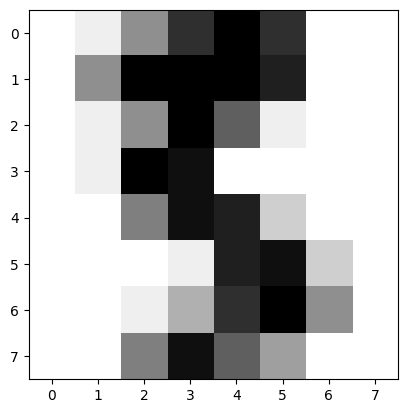

In [11]:
import matplotlib.pyplot as plt
plt.imshow(test_input[265].cpu(), cmap="binary")

certainty tensor=tensor([0.0573, 0.0795, 0.0574, 0.2122, 0.0816, 0.1235, 0.0504, 0.0833, 0.1159,
        0.1390], device='cuda:0', grad_fn=<SoftmaxBackward0>)
3 certainty=21.217576847235247%


/usr/lib/python3.11/site-packages/torch/nn/functional.py:1839: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return handle_torch_function(softmax, (input,), input, dim=dim, _stacklevel=_stacklevel, dtype=dtype)


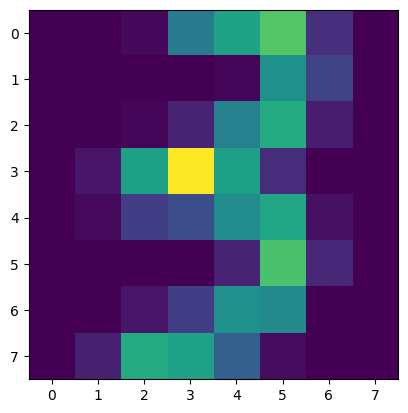

In [36]:
import pygame
import numpy as np

# Initialize Pygame
pygame.init()

# Set the width and height of the window
pixel_size = 40
window_width = 20
window_height = 20

# Calculate the actual window size based on pixel size
window_width_px = window_width * pixel_size
window_height_px = window_height * pixel_size

# Create the window
surface = pygame.display.set_mode((window_width_px, window_height_px))
pygame.display.set_caption("Pixel Drawer")

# Create a 2D array to store the pixel data
pixels = np.zeros((window_width, window_height), dtype=int)

# Flag to check if the program is running
running = True

# Main program loop
while running:
    # Check for events
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN or event.type == pygame.MOUSEMOTION:
            if pygame.mouse.get_pressed()[0]:  # Check if the left mouse button is pressed
                x, y = pygame.mouse.get_pos()
                px = x // pixel_size
                py = y // pixel_size
                pixels[px][py] = 1
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_RETURN:
                running = False

    # Clear the window
    surface.fill((255, 255, 255))

    # Draw the pixels
    for x in range(window_width):
        for y in range(window_height):
            color = (0, 0, 0) if pixels[x][y] == 1 else (255, 255, 255)
            pygame.draw.rect(surface, color, (x * pixel_size, y * pixel_size, pixel_size, pixel_size))

    # Update the display
    pygame.display.flip()

# Save the pixel data as a 2D binary array
pixels = np.rot90(pixels)
# pixels = np.rot90(pixels)
pixels = np.flipud(pixels)

# Quit Pygame
pygame.quit()

pixels

from torchvision import transforms

image = torch.tensor(pixels.copy(), dtype=torch.float32)
image = image.unsqueeze(0)

output_size = (8, 8)
transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(output_size),
        transforms.ToTensor(),
])

dsi = transform(image)
dsi

plt.imshow(dsi[0])
predarr = model(dsi.flatten().cuda())
pred = predarr.argmax().item()
certainty = predarr[pred]
print(f"certainty {predarr * 100}")
print(pred, f"certainty={certainty * 100}%")